In [1]:
%config InlineBackend.figure_format = "svg"

import sys
sys.path.append("../")

from src.networks.dn import StateType, ActionType, ObservationType, RewardType
from src.rl_algorithms.pomdp_lookahead import build_tree, pomdp_lookahead
from src.networks.qbn import QuantumBayesianNetwork as QBN
from src.networks.bn import BayesianNetwork as BN
from src.networks.ddn import DDNFactory as DDN
from src.networks.nodes import DiscreteNode
from src.trees.tree import Tree
from tqdm import tqdm

# Creating a dynamic decision network

## Example: Tiger problem

### Constructing the Dynamic Decision Network

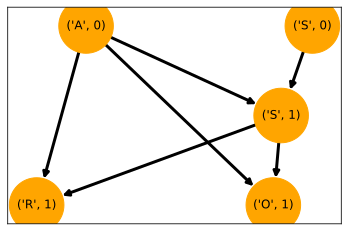

In [3]:
# Create nodes
s0 = DiscreteNode(("S", 0), node_type=StateType, value_space=[0, 1])
a0 = DiscreteNode(("A", 0), node_type=ActionType, value_space=[0, 1, 2])
s1 = DiscreteNode(("S", 1), node_type=StateType, value_space=[0, 1])
o1 = DiscreteNode(("O", 1), node_type=ObservationType, value_space=[0, 1])
r1 = DiscreteNode(("R", 1), node_type=RewardType, value_space=[-100, -1, 10])

# Settings for the POMDP
discount = 0.8
nodes = [s0, s1, o1, r1, a0]
edges = [
    (("S", 0), ("S", 1)), 
    (("A", 0), ("S", 1)), 
    (("A", 0), ("R", 1)), 
    (("A", 0), ("O", 1)), 
    (("S", 1), ("O", 1)), 
    (("S", 1), ("R", 1)) 
]

# Create the DDN structure
ddn = DDN(BN)(discount=discount)
ddn.add_nodes(nodes)
ddn.add_edges(edges)
ddn.draw()

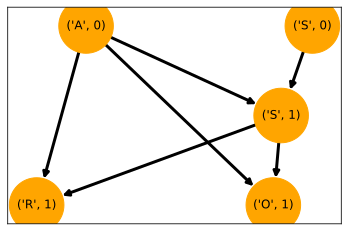

In [4]:
# Create quantum DDN
qddn = DDN(QBN)(discount=discount)
qddn.add_nodes(nodes)
qddn.add_edges(edges)
qddn.draw()

### Adding CPT data to the DDN

In [5]:
# Add data for node State 0
data = {
    ("S", 0): [0,1], 
    "Prob": [0.5,0.5]
}
ddn.add_pt(("S", 0), data)
qddn.add_pt(("S", 0), data)

# Add data for node State 1
data = {
    ("S", 0): [0,0,0,0,0,0,1,1,1,1,1,1], 
    ("A", 0): [0,0,1,1,2,2,0,0,1,1,2,2], 
    ("S", 1): [0,1,0,1,0,1,0,1,0,1,0,1], 
    "Prob": [1,0,0.5,0.5,0.5,0.5,0,1,0.5,0.5,0.5,0.5]
}
ddn.add_pt(("S", 1), data)
qddn.add_pt(("S", 1), data)

# Add data for node Evidence
data = {
    ("A", 0): [0,0,0,0,1,1,1,1,2,2,2,2], 
    ("S", 1): [0,0,1,1,0,0,1,1,0,0,1,1], 
    ("O", 1): [0,1,0,1,0,1,0,1,0,1,0,1], 
    "Prob": [0.85,0.15,0.15,0.85,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
}
ddn.add_pt(("O", 1), data)
qddn.add_pt(("O", 1), data)

# Add data for node Reward
data = {
    ("A", 0): [0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2], 
    ("S", 1): [0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1], 
    ("R", 1): [-100,-1,10,-100,-1,10,-100,-1,10,-100,-1,10,-100,-1,10,-100,-1,10], 
    "Prob": [0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0]
}
ddn.add_pt(("R", 1), data)
qddn.add_pt(("R", 1), data)

# Initialize ddn
ddn.initialize()
qddn.initialize()

### Robot search problem

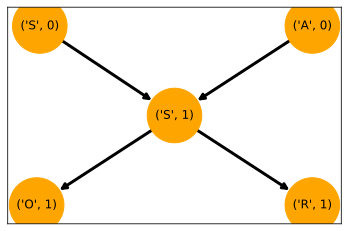

In [7]:
# Create nodes
s0 = DiscreteNode(("S", 0), node_type=StateType, value_space=[0,1,2,3])
a0 = DiscreteNode(("A", 0), node_type=ActionType, value_space=[0,1])
s1 = DiscreteNode(("S", 1), node_type=StateType, value_space=[0,1,2,3])
o1 = DiscreteNode(("O", 1), node_type=ObservationType, value_space=[0,1])
r1 = DiscreteNode(("R", 1), node_type=RewardType, value_space=[0,1])

# Settings for the POMDP
discount = 0.4
nodes = [s0, s1, o1, r1, a0]
edges = [
    (("S", 0), ("S", 1)), 
    (("A", 0), ("S", 1)),
    (("S", 1), ("O", 1)), 
    (("S", 1), ("R", 1)) 
]

# Create the DDN structure
robot_ddn = DDN(BN)(discount=discount)
robot_ddn.add_nodes(nodes)
robot_ddn.add_edges(edges)
robot_ddn.draw()

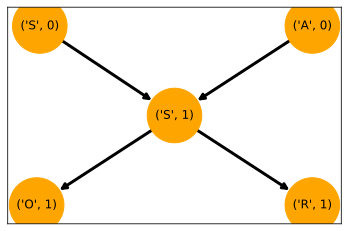

In [8]:
# Create quantum DDN structure
robot_qddn = DDN(QBN)(discount=discount)
robot_qddn.add_nodes(nodes)
robot_qddn.add_edges(edges)
robot_qddn.draw()

In [9]:
# Add data for node State 0
data = {
    ("S", 0): [0,1,2,3], 
    "Prob": [0.25,0.25,0.25,0.25]
}
robot_ddn.add_pt(("S", 0), data)
robot_qddn.add_pt(("S", 0), data)

# Add data for node State 1
data = {
    ("S", 0): [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3], 
    ("A", 0): [0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1], 
    ("S", 1): [0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3], 
    "Prob": [1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1/3,1/3,0,1/3,1/3,1/3,0,1/3,0,0,1,0,0,0,0,1]
}
robot_ddn.add_pt(("S", 1), data)
robot_qddn.add_pt(("S", 1), data)

# Add data for node Evidence
data = { 
    ("S", 1): [0,0,1,1,2,2,3,3], 
    ("O", 1): [0,1,0,1,0,1,0,1], 
    "Prob": [1,0,1,0,0,1,1,0]
}
robot_ddn.add_pt(("O", 1), data)
robot_qddn.add_pt(("O", 1), data)

# Add data for node Reward
data = { 
    ("S", 1): [0,0,1,1,2,2,3,3], 
    ("R", 1): [0,1,0,1,0,1,0,1], 
    "Prob": [1,0,1,0,0,1,1,0]
}
robot_ddn.add_pt(("R", 1), data)
robot_qddn.add_pt(("R", 1), data)

# Initialize ddn
robot_ddn.initialize()
robot_qddn.initialize()

### Calculating best action

In [10]:
# Build the lookahead tree
horizon = 2
action_space = robot_ddn.get_space(robot_ddn.action_type)
observation_space = robot_ddn.get_space(robot_ddn.observation_type)
tree = build_tree({}, action_space, observation_space, horizon)

In [12]:
n_samples = 10
print(pomdp_lookahead(robot_ddn, tree, n_samples))
print(pomdp_lookahead(robot_qddn, tree, n_samples))

{('A', 0): 1}


Sampling: 100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.45it/s]

{('A', 0): 1}


In [26]:
# Calculate best action for ten time-steps
r = []
for _ in tqdm(range(3)):
    actions = pomdp_lookahead(robot_ddn, tree, n_samples)
    observations = robot_ddn.sample_observation(actions)
    robot_ddn.belief_update(actions, observations, n_samples)
    # ddn.increase_time()
    r.append(actions)

100%|██████████| 3/3 [00:15<00:00,  5.31s/it]


In [27]:
r

[{('A', 0): 1}, {('A', 0): 1}, {('A', 0): 0}]

In [ ]:
# Should the best action be always the same???